In [1]:
import os, random, shutil
from pathlib import Path
import cv2
import numpy as np
from PIL import Image

!pip install mtcnn opencv-python

from mtcnn import MTCNN
from google.colab import drive
drive.mount('/content/drive')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 89.1 MB/s eta 0:00:00
Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

In [5]:
TRAIN_DIR = "/content/drive/MyDrive/AI_Project/experiment/split/train"
VAL_DIR   = "/content/drive/MyDrive/AI_Project/experiment/split/val"
TEST_DIR  = "/content/drive/MyDrive/AI_Project/experiment/split/test"

In [18]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16

In [6]:
IMG_SIZE = 224
BATCH_SIZE = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    VAL_DIR,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False
)


Found 12340 files belonging to 31 classes.
Found 583 files belonging to 31 classes.
Found 1218 files belonging to 31 classes.


In [19]:
base_model = VGG16(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze convolutional base


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [20]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [21]:
EPOCHS = 15

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)

Epoch 1/15
386/386 ━━━━━━━━━━━━━━━━━━━━ 62s 133ms/step - accuracy: 0.9357 - loss: 0.2313 - val_accuracy: 0.7822 - val_loss: 1.5564
Epoch 2/15
386/386 ━━━━━━━━━━━━━━━━━━━━ 42s 108ms/step - accuracy: 0.9401 - loss: 0.2078 - val_accuracy: 0.7839 - val_loss: 1.5529
Epoch 3/15
386/386 ━━━━━━━━━━━━━━━━━━━━ 42s 109ms/step - accuracy: 0.9404 - loss: 0.2084 - val_accuracy: 0.7873 - val_loss: 1.4763
Epoch 4/15
386/386 ━━━━━━━━━━━━━━━━━━━━ 42s 108ms/step - accuracy: 0.9400 - loss: 0.2079 - val_accuracy: 0.7839 - val_loss: 1.5916
Epoch 5/15
386/386 ━━━━━━━━━━━━━━━━━━━━ 45s 117ms/step - accuracy: 0.9430 - loss: 0.1987 - val_accuracy: 0.7787 - val_loss: 1.7347
Epoch 6/15
386/386 ━━━━━━━━━━━━━━━━━━━━ 78s 108ms/step - accuracy: 0.9501 - loss: 0.1810 - val_accuracy: 0.8045 - val_loss: 1.6758
Epoch 7/15
386/386 ━━━━━━━━━━━━━━━━━━━━ 42s 108ms/step - accuracy: 0.9418 - loss: 0.2199 - val_accuracy: 0.7856 - val_loss: 1.6623
Epoch 8/15
386/386 ━━━━━━━━━━━━━━━━━━━━ 42s 108ms/step - accuracy: 0.9574 - loss: 0

In [22]:
test_loss, test_acc = model.evaluate(test_ds)
print("Test accuracy:", test_acc)


39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 167ms/step - accuracy: 0.8170 - loss: 1.7186
Test accuracy: 0.8136289119720459


In [23]:
import numpy as np

# predictions (probabilities لكل class)
y_pred_prob = model.predict(test_ds)
y_pred = np.argmax(y_pred_prob, axis=1)  # multi-class

# true labels
y_true = np.concatenate([y for x, y in test_ds], axis=0)


39/39 ━━━━━━━━━━━━━━━━━━━━ 12s 206ms/step


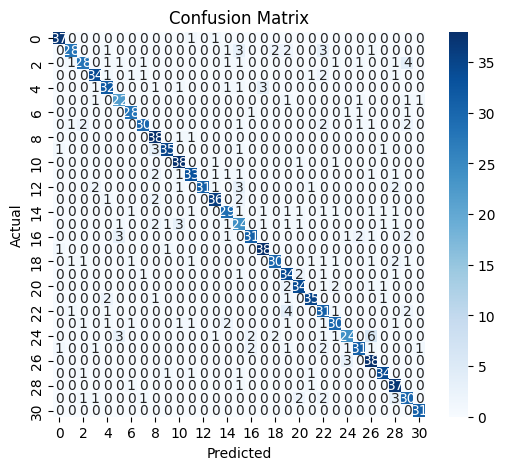

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [25]:
from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(y_true, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        39
           1       0.88      0.68      0.77        41
           2       0.82      0.68      0.75        41
           3       0.85      0.83      0.84        41
           4       0.80      0.80      0.80        40
           5       0.73      0.81      0.77        27
           6       0.85      0.88      0.86        32
           7       0.88      0.75      0.81        40
           8       0.78      0.95      0.85        40
           9       0.92      0.85      0.89        41
          10       0.83      0.93      0.87        41
          11       0.85      0.80      0.82        41
          12       1.00      0.76      0.86        41
          13       0.88      0.88      0.88        41
          14       0.78      0.72      0.75        40
          15       0.59      0.65      0.62        37
          16       0.86      0.76      0.81        41
   

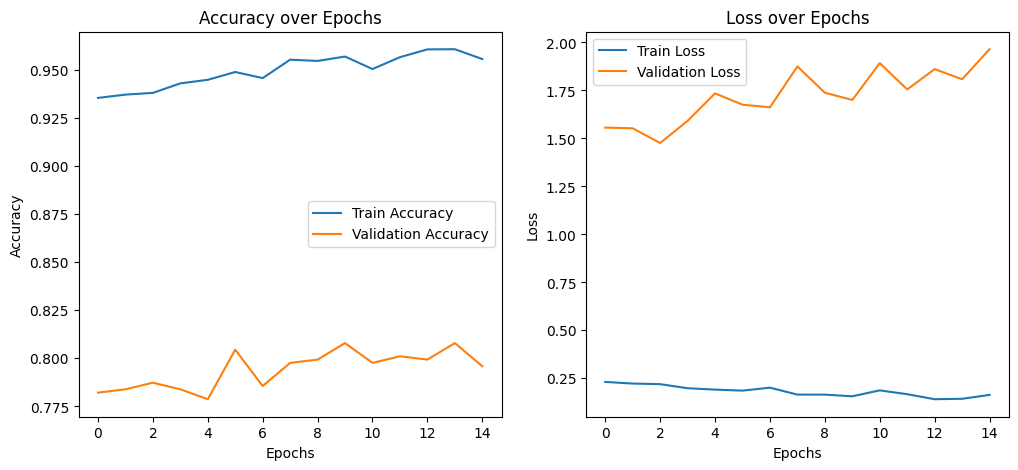

In [26]:
import matplotlib.pyplot as plt

# رسم Accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# رسم Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [27]:
model.save("/content/drive/MyDrive/AI_Project/experiment/vgg16_face_modelfinal.h5")
print("Model saved to working directory!")

Model saved to working directory!
